## Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from wordcloud import WordCloud
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
import statsmodels.api as sm

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Import Dataset

In [5]:
file_path = 'merged_file.xlsx' 

In [6]:
data=pd.read_excel(file_path)

In [7]:
print("Preview of the dataset:")
data.head()

Preview of the dataset:


,Publication Type,Authors,Book Authors,Group Authors,Book Group Authors,Researcher Ids,ORCIDs,Book Editors,Author - Arabic,Grant Principal Investigator,...,Copyright,Degree Name,Institution Address,Institution,Dissertation and Thesis Subjects,Author Keywords,Indexed Date,UT (Unique ID),Pubmed Id,Unnamed: 78
0,J,"de Alwis Jayasuriya, Gina; Riyaz, Aminath; Maj...",NaN,NaN,NaN,"Majid, Shaheen/HTO-1540-2023; Riyaz, Aminath/K...","Riyaz, Aminath/0000-0002-1591-5073; de Alwis J...",NaN,NaN,NaN,...,NaN,NaN,"Singapore Inst Management Lib, Singapore, Sing...",Singapore Inst Management Lib,NaN,NaN,2021-08-28,WOS:000686965300001,NaN,NaN
1,C,"Prasad, M. R. Murali",NaN,NaN,NaN,NaN,NaN,"Tuamsuk, K; Jatowt, A; Rasmussen, E",NaN,NaN,...,NaN,NaN,"Ctr Econ & Social Studies, Hyderabad, Andhra P...",Ctr Econ & Social Studies,NaN,NaN,2014-12-17,WOS:000345029000036,NaN,NaN
2,J,"Liyana, S.; Noorhidawati, A.",NaN,NaN,NaN,"ABDULLAH, NOORHIDAWATI/B-9288-2010; Shuib, Liy...","Shuib, Liyana/0000-0002-7907-0671; Abdullah, N...",NaN,NaN,NaN,...,NaN,NaN,"Univ Malaya, Fac Comp Sci & Informat Technol, ...",NaN,NaN,NaN,2014-09-17,WOS:000341233600001,NaN,NaN
3,C,"Mohamad, Ahmad Nadzri; Masrek, Mohamad Noorman...",NaN,NaN,IEEE,"Rasam, Abdul/AAP-9658-2020; Mohamad, Ahmad Nad...","Mohamad, Ahmad Nadzri/0000-0002-2690-4564; Mas...",NaN,NaN,NaN,...,NaN,NaN,"Univ Teknol MARA, Fac Informat Management, Sel...",NaN,NaN,NaN,2013-12-11,WOS:000326825500047,NaN,NaN
4,J,"Abrizah, A.; Noorhidawati, A.; Zainab, A. N.",NaN,NaN,NaN,"ABDULLAH, NOORHIDAWATI/B-9288-2010; Zainab, A....","Abdullah, Noorhidawati/0000-0002-3291-8479; Ab...",NaN,NaN,NaN,...,NaN,NaN,"Univ Malaya, Fac Comp Sci & Informat Technol, ...",Minist Educ Malaysia,NaN,NaN,2015-02-01,WOS:000348324000001,NaN,NaN


## Data Cleaning

In [8]:
data.columns = [col.strip().lower().replace(' ', '_') for col in data.columns]

In [9]:
data = data.dropna(subset=['publication_year', 'article_title', 'authors'])

In [10]:
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['publication_type', 'authors', 'book_authors', 'group_authors',
       'book_group_authors', 'researcher_ids', 'orcids', 'book_editors',
       'author_-_arabic', 'grant_principal_investigator',
       'grant_co_principal_investigator', 'article_title',
       'article_title_-_scielo', 'article_title_-_scielo.1',
       'article_title_-_chinese', 'article_title_-_russian', 'patent_number',
       'patent_assignee', 'source_title_-_arabic', 'source_title',
       'source_title_-_korean', 'book_series_title', 'book_series_subtitle',
       'volume', 'issue', 'special_issue', 'meeting_abstract', 'start_page',
       'end_page', 'article_number', 'version', 'version_history', 'doi',
       'book_doi', 'license_name', 'license_uri', 'license_description',
       'early_access_date', 'supplement', 'document_type', 'publication_date',
       'publication_year', 'abstract', 'abstract_-_foreign',
       'abstract_-_english_transliteration', 'abstract_-_foreign.1',

In [11]:
# Extract country information from the institution_address column
data['country'] = data['institution_address'].str.extract(r',\s*([\w\s]+)$')  # Adjust regex as needed

# Preview extracted country data
print(data['country'].value_counts())

country
Malaysia        3754
Singapore       2940
Indonesia       2526
Thailand        2237
Vietnam          833
                ... 
CA 94158 USA       1
NC 27109 USA       1
MA 02540 USA       1
WA 98104 USA       1
OR 97124 USA       1
Name: count, Length: 572, dtype: int64


In [12]:
# If the 'country' column exists, display unique values
if 'country' in data.columns:
    unique_countries = data['country'].dropna().unique()
    print("Unique countries in the dataset:")
    print(unique_countries)
else:
    print("'country' column is missing in the dataset.")


Unique countries in the dataset:
['Singapore' 'India' 'Malaysia' 'Indonesia' 'PHILIPPINES' 'PA 19104 USA'
 'Thailand' 'CT 06430 USA' 'Japan' 'Taiwan' 'Philippines' 'South Korea'
 'Spain' 'Canada' 'VA USA' 'England' 'Peoples R China' 'THAILAND'
 'Nigeria' 'NM 88003 USA' 'MA 02139 USA' 'Switzerland' 'Vietnam'
 'Netherlands' 'Kuwait' 'Saudi Arabia' 'IL 60439 USA' 'France'
 'New Zealand' 'WA 98195 USA' 'MA 02115 USA' 'Germany' 'Italy'
 'UT 84322 USA' 'Iran' 'MALAYSIA' 'Iraq' 'Romania' 'Austria' 'Kazakhstan'
 'Australia' 'Russia' 'Ethiopia' 'NY 10027 USA' 'SINGAPORE' 'Finland'
 'NY 10022 USA' 'GA 30332 USA' 'CA 90032 USA' 'FL USA' 'GA 30302 USA'
 'LA 71105 USA' 'Chile' 'Pakistan' 'Turkey' 'Laos' 'Latvia' 'MA 02215 USA'
 'Jordan' 'Portugal' 'NY 13126 USA' 'NY 10021 USA' 'Ireland' 'NC USA'
 'Hungary' 'Lithuania' 'RI 02912 USA' 'MA 02155 USA' 'CA USA' 'Nepal'
 'OH 45701 USA' 'IA 52242 USA' 'MD USA' 'Belgium' 'Poland' 'Bangladesh'
 'Czech Republic' 'Kenya' 'Slovenia' 'AZ USA' 'Sweden' 'U Arab E

In [13]:
data['country'] = data['country'].str.title()

In [14]:
asean_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia',
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam','Brunei Darussalam'
]

In [15]:
data = data[data['country'].isin(asean_countries)]

In [16]:
print("Cleaned and filtered ASEAN countries:")
print(data)

Cleaned and filtered ASEAN countries:
      publication_type                                            authors  \
0                    J  de Alwis Jayasuriya, Gina; Riyaz, Aminath; Maj...   
2                    J                       Liyana, S.; Noorhidawati, A.   
3                    C  Mohamad, Ahmad Nadzri; Masrek, Mohamad Noorman...   
4                    J       Abrizah, A.; Noorhidawati, A.; Zainab, A. N.   
5                    C  Hamidah, N.; Pramadi, A.; Sholikha, M.; Maspup...   
...                ...                                                ...   
19991                J  Pradubwong, Suteera; Augsornwan, Darawan; Path...   
19992                J                  Donayre, D. K. M.; Dalisay, T. U.   
19995                J                                  Teow, LN; Loe, KF   
19996                C                         Jatmiko, I; Sentosa, A. A.   
19997                J  Klaythong, Sirinporn; Boontas, Teerapat; Khums...   

      book_authors group_authors book

In [17]:
# Check for columns with all NaN values
columns_with_all_nan = data.columns[data.isna().all()].tolist()

# Print columns with all NaN values
print(f"Columns with all NaN values: {columns_with_all_nan}")

Columns with all NaN values: ['grant_principal_investigator', 'grant_co_principal_investigator', 'article_title_-_scielo.1', 'source_title_-_korean', 'book_series_subtitle', 'version', 'version_history', 'license_name', 'license_uri', 'license_description', 'abstract_-_english_transliteration', 'abstract_-_korean', '180_day_usage_count', 'since_2013_usage_count', 'grant_number', 'no_of_references', 'cited_references', 'language', 'advisor', 'committee_member', 'copyright', 'degree_name', 'dissertation_and_thesis_subjects', 'author_keywords', 'unnamed:_78']


In [18]:
# Drop these columns
data = data.drop(columns=columns_with_all_nan)

# Confirm columns have been removed
print("Remaining columns after dropping:")
print(data.columns)

Remaining columns after dropping:
Index(['publication_type', 'authors', 'book_authors', 'group_authors',
       'book_group_authors', 'researcher_ids', 'orcids', 'book_editors',
       'author_-_arabic', 'article_title', 'article_title_-_scielo',
       'article_title_-_chinese', 'article_title_-_russian', 'patent_number',
       'patent_assignee', 'source_title_-_arabic', 'source_title',
       'book_series_title', 'volume', 'issue', 'special_issue',
       'meeting_abstract', 'start_page', 'end_page', 'article_number', 'doi',
       'book_doi', 'early_access_date', 'supplement', 'document_type',
       'publication_date', 'publication_year', 'abstract',
       'abstract_-_foreign', 'abstract_-_foreign.1', 'conference_title',
       'conference_date', 'conference_sponsor', 'conference_location',
       'times_cited,_wos_core', 'times_cited,_cscd', 'times_cited,_rsci',
       'times_cited,_arci', 'times_cited,_bci', 'times_cited,_scielo',
       'times_cited,_all_databases', 'issn', 'e

In [19]:
data['region'] = data['country'].apply(lambda x: 'ASEAN' if x in asean_countries else 'Global')

In [20]:
# Separate ASEAN and Global papers
asean_papers = data[data['region'] == "ASEAN"]
global_papers = data[data['region'] == "Global"]

# Word frequency analysis on abstracts
asean_word_freq = asean_papers['abstract'].dropna().str.split(expand=True).stack().value_counts()
global_word_freq = global_papers['abstract'].dropna().str.split(expand=True).stack().value_counts()

In [21]:
# Generate descriptive statistics for citation impact
desc_stats = data[['publication_year', 'times_cited,_all_databases']].describe()

# Print summary
print("Descriptive Statistics for Citation Impact:")
print(desc_stats)


Descriptive Statistics for Citation Impact:
       publication_year  times_cited,_all_databases
count      13341.000000                13341.000000
mean        2016.261225                   17.894536
std            7.337835                   75.258420
min         1973.000000                    0.000000
25%         2014.000000                    0.000000
50%         2018.000000                    4.000000
75%         2021.000000                   14.000000
max         2025.000000                 3857.000000


## Publication Year vs. Citation Count

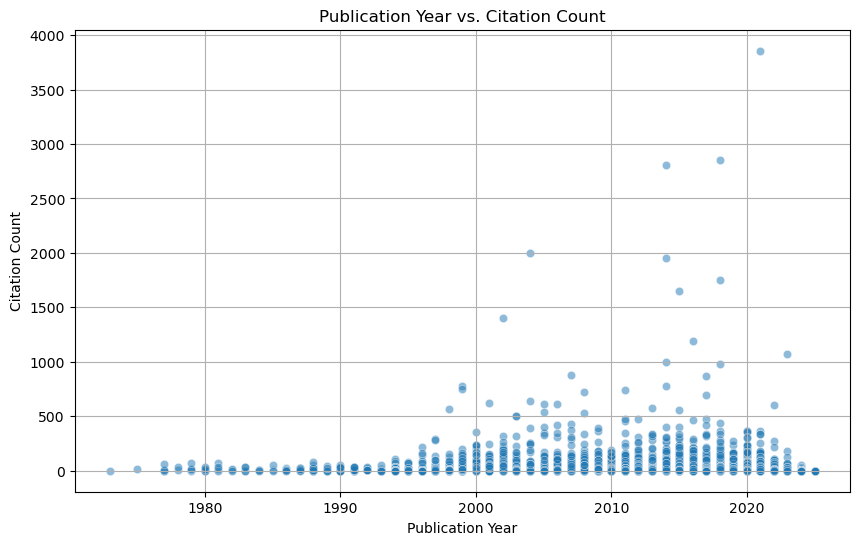

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['publication_year'], y=data['times_cited,_all_databases'], alpha=0.5)
plt.title("Publication Year vs. Citation Count")
plt.xlabel("Publication Year")
plt.ylabel("Citation Count")
plt.grid(True)
plt.show()

## Publication Trends

In [23]:
pub_trends = data.groupby('publication_year').size().reset_index(name='publication_count')

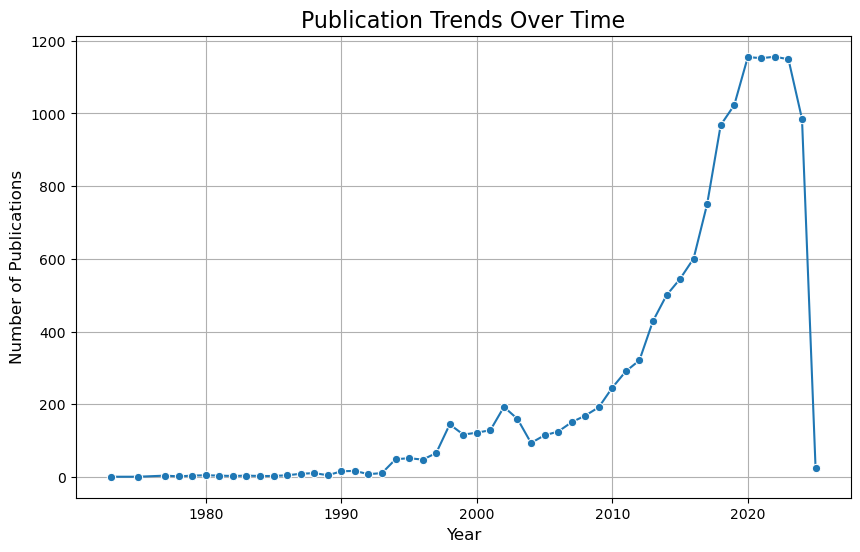

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='publication_year', y='publication_count', data=pub_trends, marker='o')
plt.title('Publication Trends Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Publications', fontsize=12)
plt.grid(True)
plt.show()

In [25]:
data['article_title']

0        A review of the library and information scienc...
2        How graduate students seek for information: Co...
3        A BIBLIOMETRIC ANALYSIS ON SCIENTIFIC PRODUCTI...
4        LIS journals categorization in the Journal Cit...
5        Development of science comics as information m...
                               ...                        
19991    Empowering Volunteers at Tawanchai Centre for ...
19992    Identification, characterisation, and localisa...
19995    Effective learning in recurrent max-min neural...
19996    Age, growth, and mortality of starspotted smoo...
19997    INFECTION PREVENTION AND CONTROL IN A RURAL CO...
Name: article_title, Length: 13341, dtype: object

In [26]:
data['abstract'].head(10)

0     The Republic of Maldives, a small island devel...
2     This paper reports on the information seeking ...
3     Geographical Information System (GIS) has been...
4     This stated preference study approached the is...
5     Science comics is one of information media tha...
6                                                   NaN
7                                                   NaN
8     A new layer of complexity, constituted of netw...
10    The Malaysian Journal of Library and Informati...
11    This research aims to incorporate the results ...
Name: abstract, dtype: object

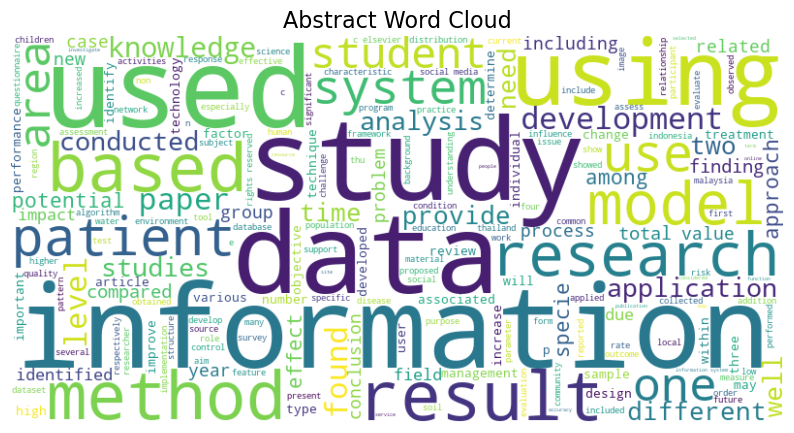

In [27]:
if 'abstract' in data.columns:
    text_data = (
        data['abstract']
        .dropna()  
        .astype(str)  
        .str.cat(sep=' ')  
        .lower()  
    )

    # Generate a word cloud
    wordcloud = WordCloud(
        width=800, height=400, background_color='white'
    ).generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Abstract Word Cloud', fontsize=16)
    plt.show()
else:
    print("The 'abstract' column is not available in the dataset.")

## Most Influential Authors in ASEAN

In [28]:
if 'authors' in data.columns:

    # Build co-authorship network
    def build_coauthorship_network(authors_list):
        G = nx.Graph()
        for authors in authors_list.dropna():
            authors_split = [a.strip() for a in authors.split(';')]
            for i in range(len(authors_split)):
                for j in range(i + 1, len(authors_split)):
                    G.add_edge(authors_split[i], authors_split[j])
        return G

    coauthorship_graph = build_coauthorship_network(data['authors'])

In [29]:
if 'authors' in data.columns:
    # Efficient co-authorship network construction
    def build_coauthorship_network(authors_list):
        G = nx.Graph()
        edges = defaultdict(int)

        for authors in authors_list.dropna():
            authors_split = [a.strip() for a in authors.split(';') if a.strip()]
            for i, author1 in enumerate(authors_split):
                for author2 in authors_split[i + 1:]:
                    edges[tuple(sorted([author1, author2]))] += 1  # Count co-authorships

        # Add edges to graph with weights
        for (author1, author2), weight in edges.items():
            G.add_edge(author1, author2, weight=weight)

        return G

    coauthorship_graph = build_coauthorship_network(data['authors'])

    print(f"Total Nodes: {coauthorship_graph.number_of_nodes()}")
    print(f"Total Edges: {coauthorship_graph.number_of_edges()}")

Total Nodes: 47537
Total Edges: 168071


In [30]:
def extract_coauthor_pairs(authors_list):
    coauthor_pairs = []
    for authors in authors_list.dropna():
        author_set = [a.strip() for a in authors.split(';') if a.strip()]
        for i in range(len(author_set)):
            for j in range(i + 1, len(author_set)):
                coauthor_pairs.append((author_set[i], author_set[j]))
    return coauthor_pairs

In [31]:
coauthor_pairs = extract_coauthor_pairs(data['authors'])

In [32]:
G = nx.Graph()
G.add_edges_from(coauthor_pairs)

In [33]:
author_counts = Counter([author for pair in coauthor_pairs for author in pair])
top_authors = author_counts.most_common(20)

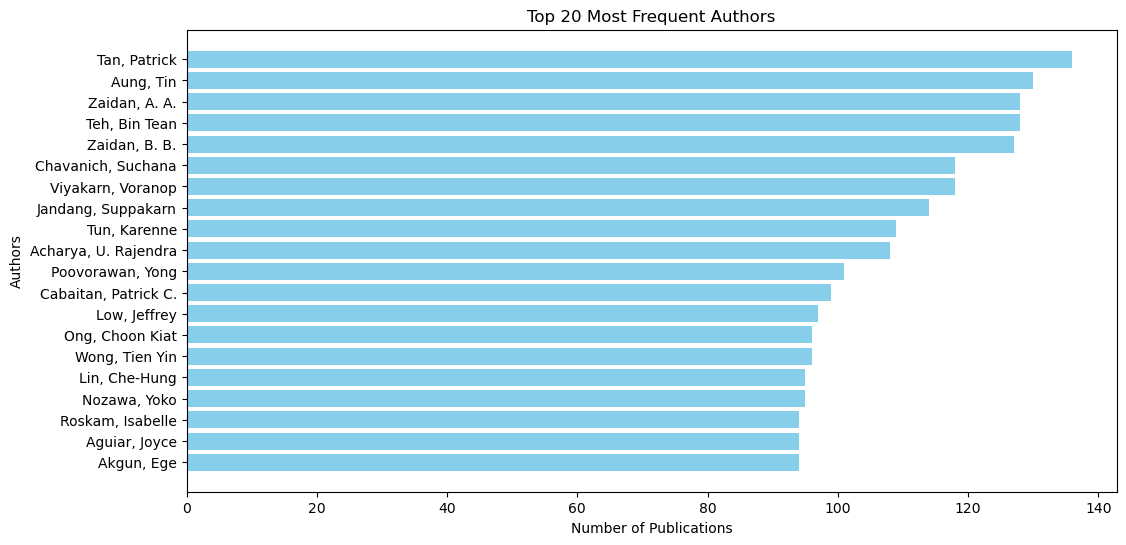

In [34]:
# Plot most frequent authors
plt.figure(figsize=(12, 6))
names, counts = zip(*top_authors)
plt.barh(names[::-1], counts[::-1], color='skyblue')
plt.xlabel("Number of Publications")
plt.ylabel("Authors")
plt.title("Top 20 Most Frequent Authors")
plt.show()

## Co-Authorship Degree Distribution

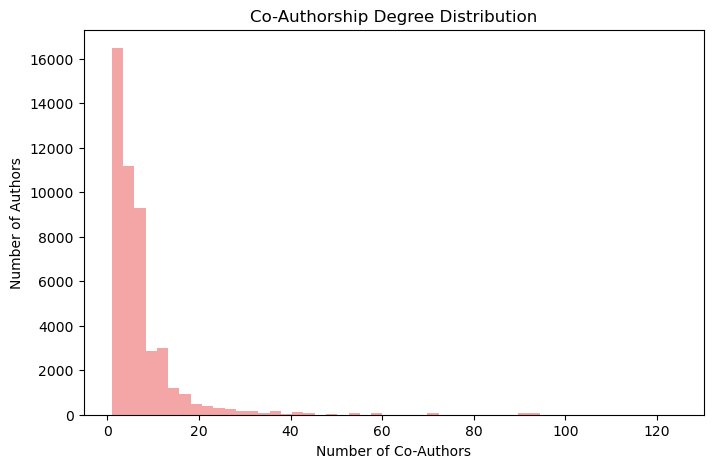

In [35]:
# Degree distribution (How many authors have how many connections)
degree_sequence = [d for _, d in G.degree()]
plt.figure(figsize=(8, 5))
plt.hist(degree_sequence, bins=50, color='lightcoral', alpha=0.7)
plt.xlabel("Number of Co-Authors")
plt.ylabel("Number of Authors")
plt.title("Co-Authorship Degree Distribution")
plt.show()

📊 Average Number of Authors per Paper: 4.33

🏛️ Top 5 Most Collaborative Institutions:
institution
University of Malaya (Malaysia)               316
Multimedia University (Malaysia)              106
Universitas Islam Sultan Agung (Indonesia)     26
Ngee Ann Polytech                              21
Univ Teknol MARA                               18
Name: count, dtype: int64


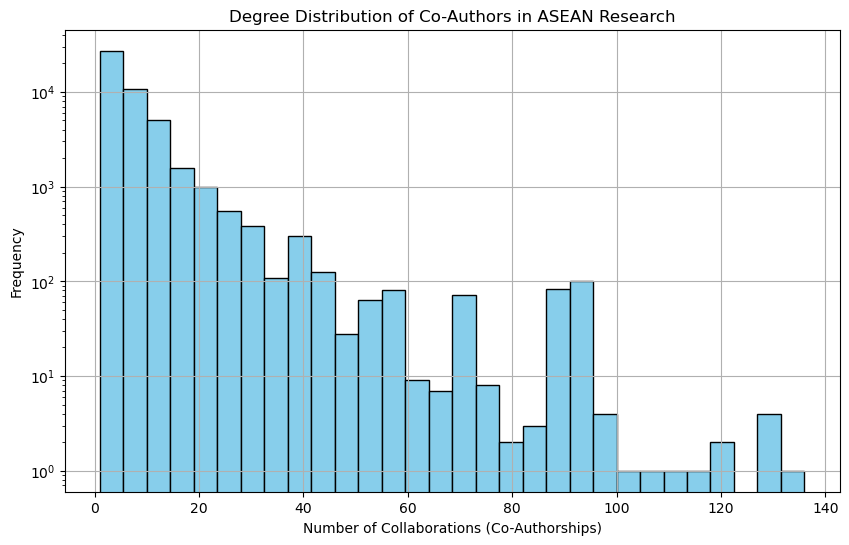

In [36]:
# Step 1: Compute Average Team Size
data['num_authors'] = data['authors'].apply(lambda x: len(str(x).split(';')) if pd.notna(x) else 0)
avg_team_size = data['num_authors'].mean()
print(f"📊 Average Number of Authors per Paper: {avg_team_size:.2f}")

# Step 2: Identify Most Collaborative Institutions
top_institutions = data['institution'].dropna().str.split(';').explode().value_counts().head(5)
print("\n🏛️ Top 5 Most Collaborative Institutions:")
print(top_institutions)

# Step 3: Compute Degree Distribution (Number of Collaborations per Author)
coauthor_pairs = []
for authors in data['authors'].dropna():
    author_list = [a.strip() for a in authors.split(';')]
    for i in range(len(author_list)):
        for j in range(i + 1, len(author_list)):
            coauthor_pairs.append((author_list[i], author_list[j]))

author_counts = Counter([author for pair in coauthor_pairs for author in pair])
author_df = pd.DataFrame(author_counts.items(), columns=['Author', 'Collaboration_Count'])
author_df = author_df.sort_values(by='Collaboration_Count', ascending=False)

# Step 4: Plot Degree Distribution
plt.figure(figsize=(10, 6))
plt.hist(author_df['Collaboration_Count'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Number of Collaborations (Co-Authorships)")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Co-Authors in ASEAN Research")
plt.yscale('log')  # Log scale to handle skewed distribution
plt.grid(True)
plt.show()

## Top Journals by Publication Count

C:\Users\Bryan\AppData\Local\Temp\ipykernel_2744\2390064549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=journal_counts.values, y=journal_counts.index, palette='coolwarm')


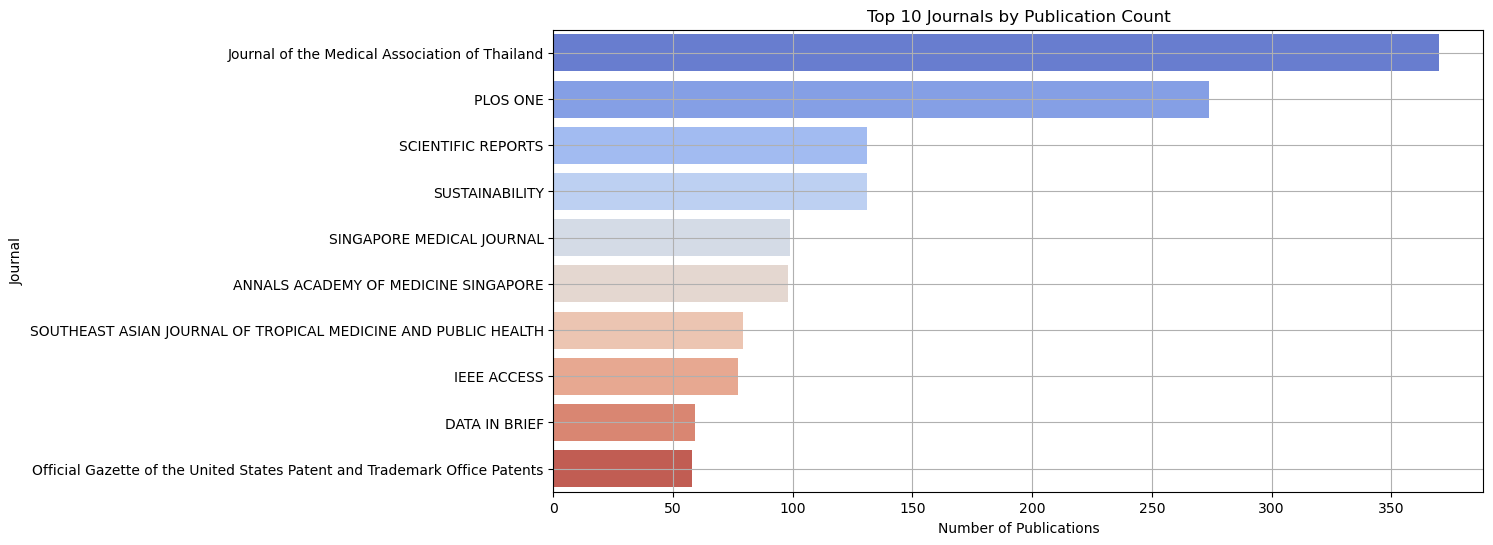

In [38]:
journal_counts = data['source_title'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=journal_counts.values, y=journal_counts.index, palette='coolwarm')
plt.title("Top 10 Journals by Publication Count")
plt.xlabel("Number of Publications")
plt.ylabel("Journal")
plt.grid(True)
plt.show()

## Most Influential Paper from ASEAN 

In [39]:
# Convert citation count column to numeric
data['times_cited,_all_databases'] = pd.to_numeric(data['times_cited,_all_databases'], errors='coerce')

# Find Top 20 Most Influential Papers by Citation Count
top_papers = data.nlargest(20, 'times_cited,_all_databases')[['article_title', 'times_cited,_all_databases']]

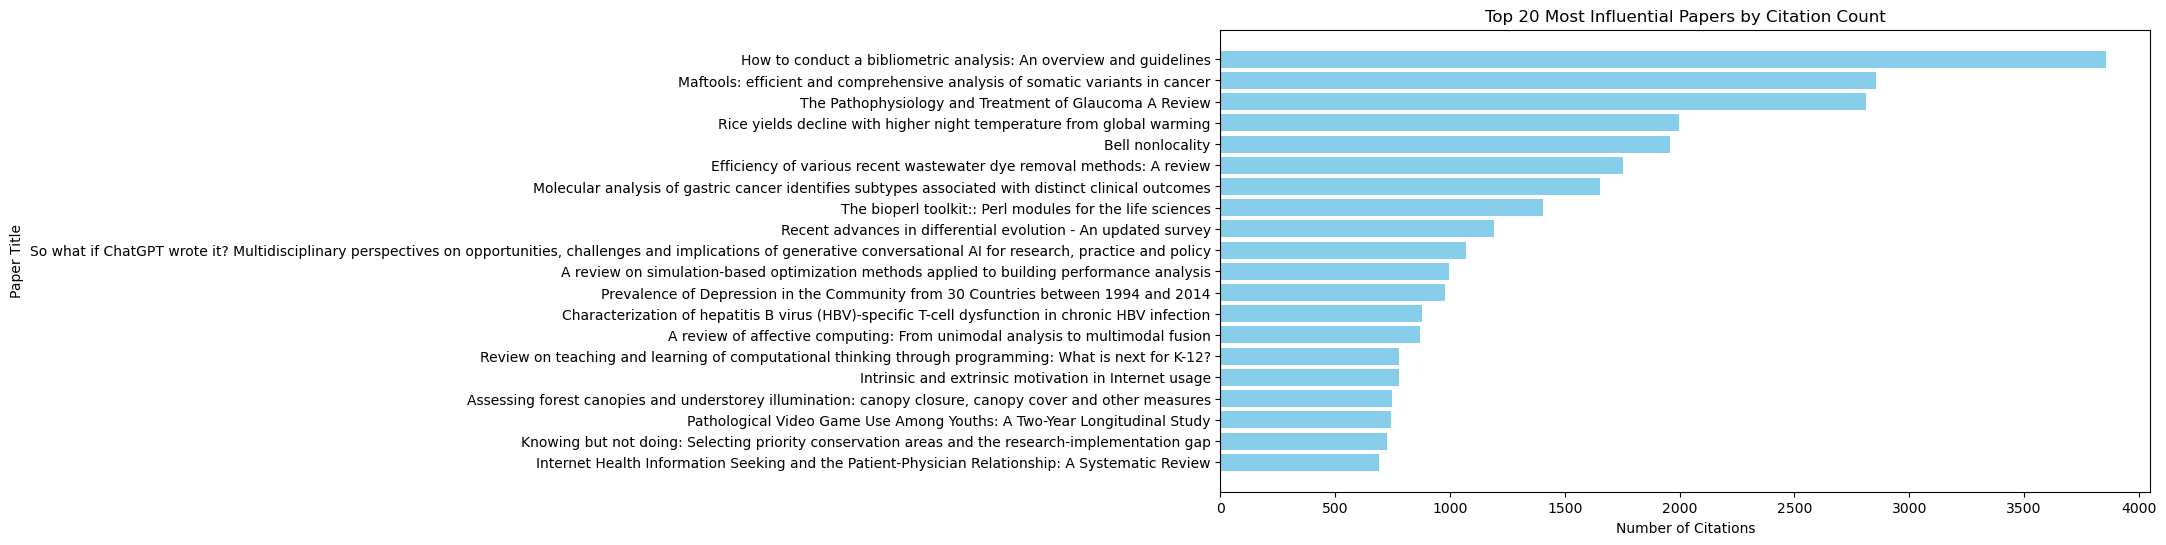

In [40]:
plt.figure(figsize=(12, 6))
plt.barh(top_papers['article_title'][::-1], top_papers['times_cited,_all_databases'][::-1], color='skyblue')
plt.xlabel("Number of Citations")
plt.ylabel("Paper Title")
plt.title("Top 20 Most Influential Papers by Citation Count")
plt.show()

# Most Influential ASEAN Countries by Citations, Collaboration Count, and Publication Count

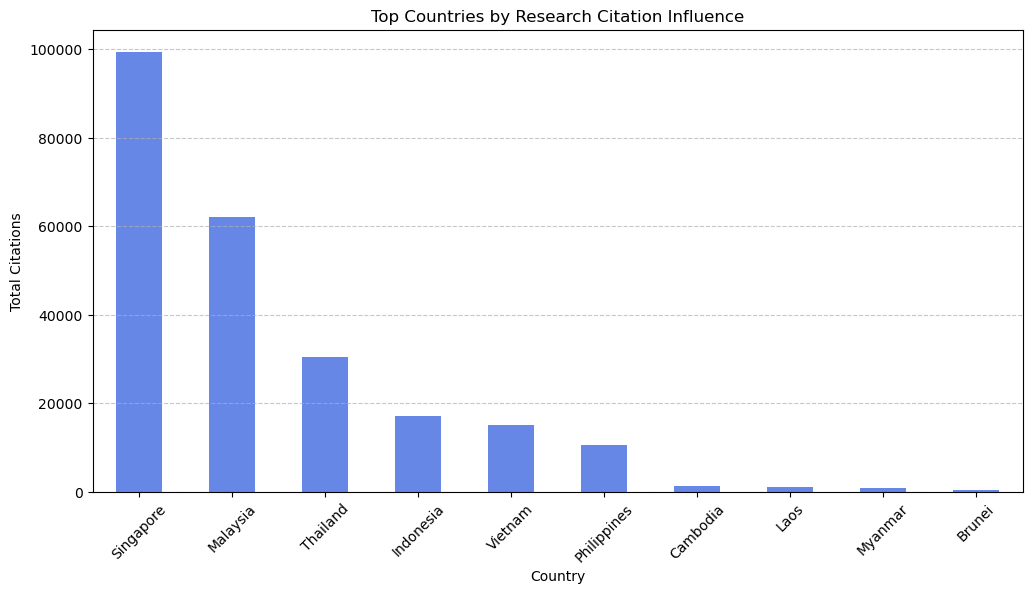

In [41]:
if 'country' in data.columns and 'times_cited,_all_databases' in data.columns:
    # Convert citation count to numeric, handling missing values
    data['times_cited,_all_databases'] = pd.to_numeric(data['times_cited,_all_databases'], errors='coerce').fillna(0)
    
    # Aggregate citations by country
    country_citations = data.groupby('country')['times_cited,_all_databases'].sum().sort_values(ascending=False)

    # Plot the top 15 countries with the highest citations
    plt.figure(figsize=(12, 6))
    country_citations.head(15).plot(kind='bar', color='royalblue', alpha=0.8)
    plt.xlabel('Country')
    plt.ylabel('Total Citations')
    plt.title('Top Countries by Research Citation Influence')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Required columns not found in the dataset.")

## Citation Influence by Country

C:\Users\Bryan\AppData\Local\Temp\ipykernel_2744\2436825023.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='times_cited,_all_databases', y='country', data=country_citations.head(10), palette='viridis')


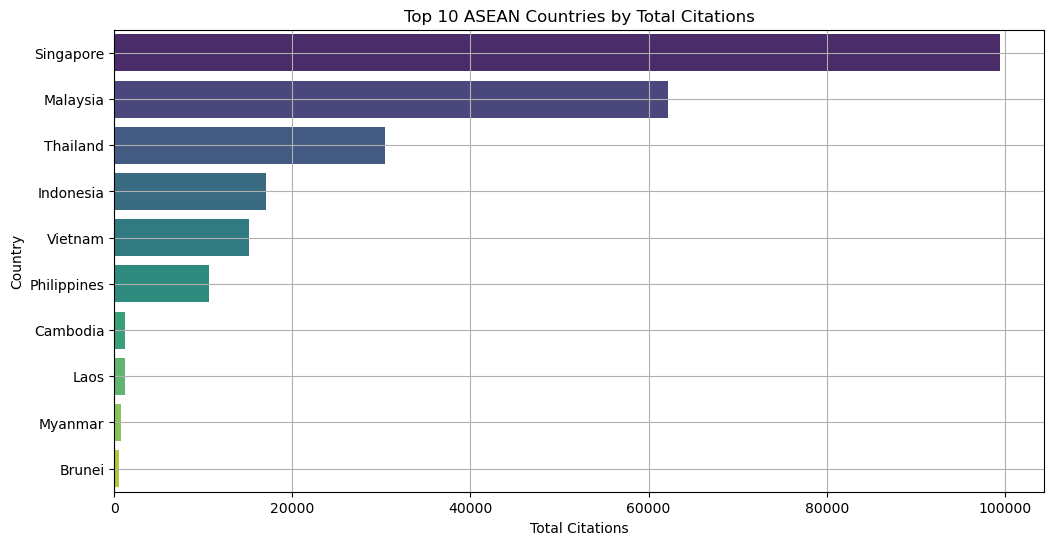

In [42]:
country_citations = data.groupby('country')['times_cited,_all_databases'].sum().reset_index()
country_citations = country_citations.sort_values(by='times_cited,_all_databases', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='times_cited,_all_databases', y='country', data=country_citations.head(10), palette='viridis')
plt.title("Top 10 ASEAN Countries by Total Citations")
plt.xlabel("Total Citations")
plt.ylabel("Country")
plt.grid(True)
plt.show()

C:\Users\Bryan\AppData\Local\Temp\ipykernel_2744\3391867551.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='collaboration_count', y='country', data=country_collaborations.head(5), palette='viridis')


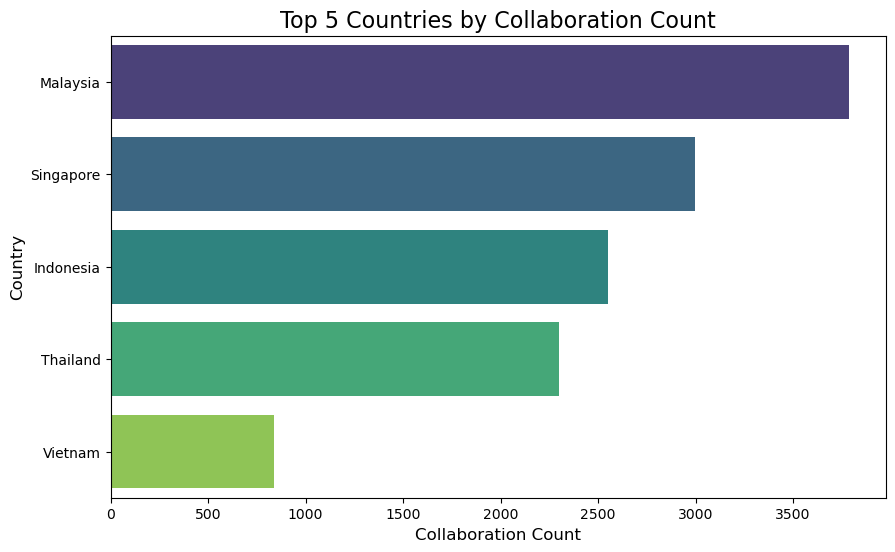

In [43]:
# Count the number of publications by country
if 'country' not in data.columns and 'institution_address' in data.columns:
    data['country'] = data['institution_address'].str.extract(r',\s*([\w\s]+)$')  # Extract country

# Count collaborations by country
country_collaborations = data['country'].value_counts().reset_index()
country_collaborations.columns = ['country', 'collaboration_count']

# Plot top 10 countries by collaboration count
plt.figure(figsize=(10, 6))
sns.barplot(x='collaboration_count', y='country', data=country_collaborations.head(5), palette='viridis')
plt.title('Top 5 Countries by Collaboration Count', fontsize=16)
plt.xlabel('Collaboration Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()


C:\Users\Bryan\AppData\Local\Temp\ipykernel_2744\76578480.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='publication_count', y='country', data=publications_by_country.head(5), palette='viridis')


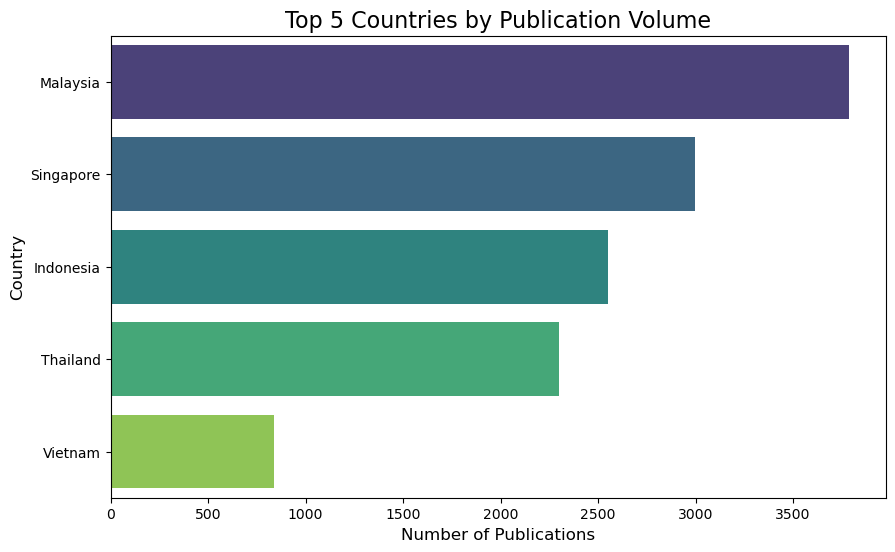

In [44]:
# Aggregate publications by country
if 'country' in data.columns:
    publications_by_country = data['country'].value_counts().reset_index()
    publications_by_country.columns = ['country', 'publication_count']

    # Plot top 10 countries by publication count
    plt.figure(figsize=(10, 6))
    sns.barplot(x='publication_count', y='country', data=publications_by_country.head(5), palette='viridis')
    plt.title('Top 5 Countries by Publication Volume', fontsize=16)
    plt.xlabel('Number of Publications', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.show()


# Regression Analysis for Predicting Citation Counts

In [48]:
# Select independent variables
X = data[['publication_year', 'num_authors']]

# Add constant for intercept
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print("\n📌 Variance Inflation Factor (VIF) Test Results:")
print(vif_data)


📌 Variance Inflation Factor (VIF) Test Results:
            Feature           VIF
0             const  77174.254932
1  publication_year      1.023473
2       num_authors      1.023473


In [42]:
if 'times_cited,_all_databases' in data.columns:
    data = data.dropna(subset=['times_cited,_all_databases']) 
    X = data[['publication_year']]
    y = data['times_cited,_all_databases']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nRegression Results:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")


Regression Results:
R² Score: 0.0193
Mean Squared Error: 3899.58


In [49]:
# Drop NaN values in relevant columns
data = data.dropna(subset=['times_cited,_all_databases', 'publication_year', 'authors', 'institution'])

# Feature Engineering: Create new predictors
data['num_authors'] = data['authors'].apply(lambda x: len(str(x).split(';')) if pd.notna(x) else 0)
data['num_institutions'] = data['institution'].apply(lambda x: len(str(x).split(';')) if pd.notna(x) else 0)

# Selecting features for regression
X = data[['publication_year', 'num_authors', 'num_institutions']]
y = data['times_cited,_all_databases']

# Add constant term for statsmodels regression
X = sm.add_constant(X)

# Train the model
model = sm.OLS(y, X).fit()

# Print summary of regression
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     times_cited,_all_databases   R-squared:                       0.087
Model:                                    OLS   Adj. R-squared:                  0.086
Method:                         Least Squares   F-statistic:                     193.9
Date:                        Tue, 11 Mar 2025   Prob (F-statistic):           3.46e-81
Time:                                09:06:27   Log-Likelihood:                -22221.
No. Observations:                        4080   AIC:                         4.445e+04
Df Residuals:                            4077   BIC:                         4.447e+04
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

C:\Users\Bryan\AppData\Local\Temp\ipykernel_2744\4220562347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_authors'] = data['authors'].apply(lambda x: len(str(x).split(';')) if pd.notna(x) else 0)
C:\Users\Bryan\AppData\Local\Temp\ipykernel_2744\4220562347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_institutions'] = data['institution'].apply(lambda x: len(str(x).split(';')) if pd.notna(x) else 0)


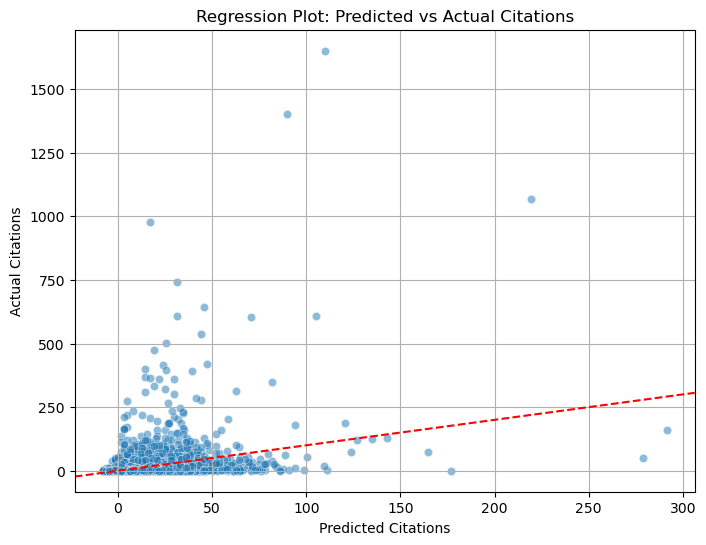

In [50]:
# Predict citations using the model
y_pred = model.predict(X)

# Scatter plot of actual vs predicted citations
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=data['times_cited,_all_databases'], alpha=0.5)
plt.xlabel("Predicted Citations")
plt.ylabel("Actual Citations")
plt.title("Regression Plot: Predicted vs Actual Citations")
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Ideal fit line
plt.grid(True)
plt.show()

## Alternative Models

In [52]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate model
print("Random Forest R² Score:", r2_score(y_test, y_pred))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred))

Random Forest R² Score: 0.020037329569287055
Random Forest MSE: 4293.407331235381


In [55]:
# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate model
print("Gradient Boosting R² Score:", r2_score(y_test, y_pred_gb))
print("Gradient Boosting MSE:", mean_squared_error(y_test, y_pred_gb))

Gradient Boosting R² Score: 0.04392664147629033
Gradient Boosting MSE: 4188.743602733747


In [58]:
# Create polynomial features (degree=2 for quadratic)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train model
poly_model.fit(X_train, y_train)

# Predict
y_pred_poly = poly_model.predict(X_test)

# Evaluate
print("Polynomial Regression R² Score:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))

Polynomial Regression R² Score: 0.15353053205613476
Polynomial Regression MSE: 3708.547610022517


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('poly', make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1))
]

stack = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stack.fit(X_train, y_train)

y_pred_stack = stack.predict(X_test)

print("Stacking Model R²:", r2_score(y_test, y_pred_stack))
print("Stacking Model MSE:", mean_squared_error(y_test, y_pred_stack))


Stacking Model R²: 0.11917601017448409
Stacking Model MSE: 3859.061461782745


## TF-IDF Analysis for ASEAN Research Trends

In [43]:
data = data.dropna(subset=['abstract'])

In [44]:
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf.fit_transform(data['abstract'])

In [45]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [46]:
tfidf_df['year'] = data['publication_year'].values

In [47]:
tfidf_trends = tfidf_df.groupby('year').mean()

In [48]:
top_keywords = ['data', 'learning','information','science','analysis',]

<Figure size 1200x600 with 0 Axes>

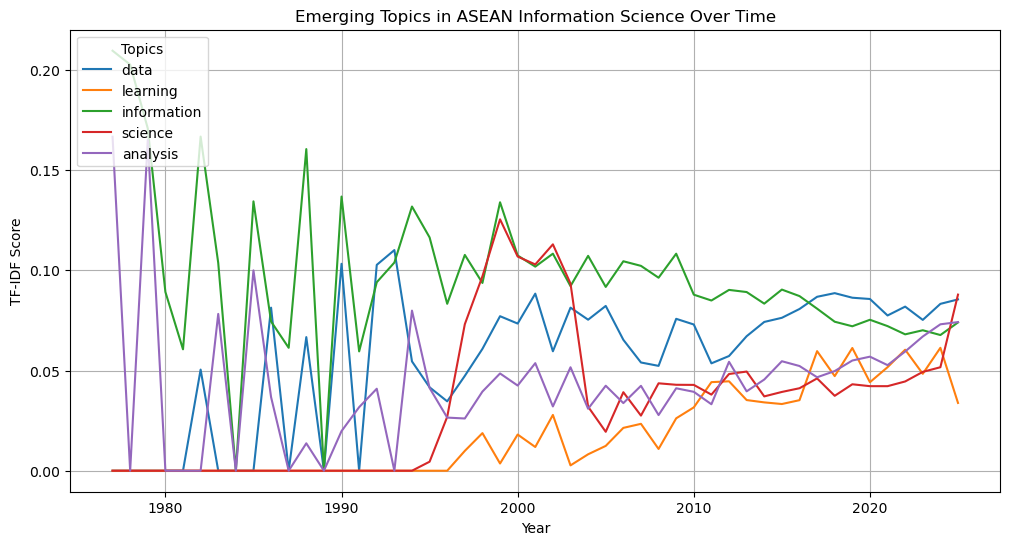

In [49]:
# Plot TF-IDF trends
plt.figure(figsize=(12, 6))
tfidf_trends[top_keywords].plot(figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("TF-IDF Score")
plt.title("Emerging Topics in ASEAN Information Science Over Time")
plt.legend(title="Topics", loc='upper left')
plt.grid(True)
plt.show()

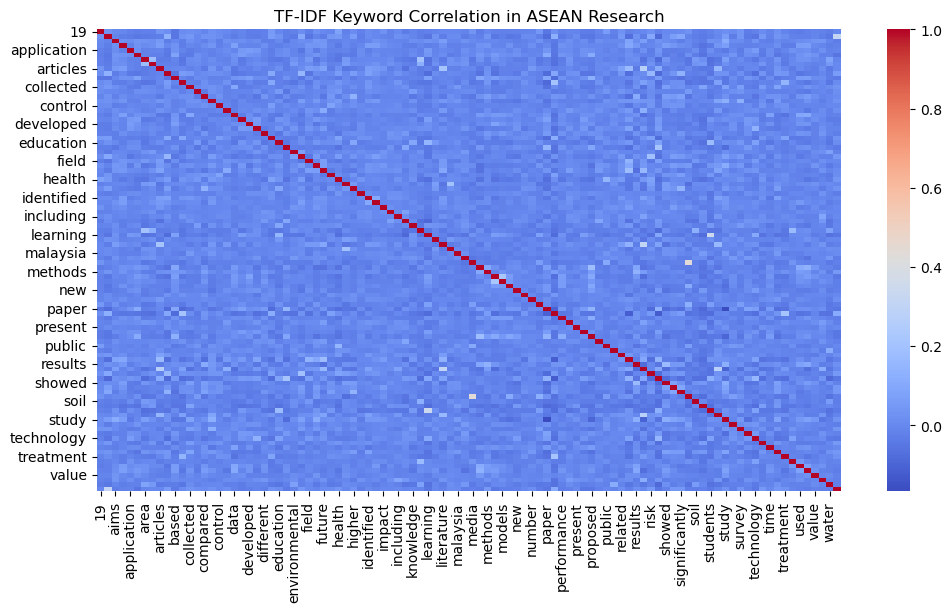

In [50]:
data = data.dropna(subset=['abstract'])
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf.fit_transform(data['abstract'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
plt.figure(figsize=(12, 6))
sns.heatmap(tfidf_df.corr(), cmap="coolwarm", annot=False)
plt.title("TF-IDF Keyword Correlation in ASEAN Research")
plt.show()